<a href="https://colab.research.google.com/github/mariaelisa93/DS-project---Road-accidents-in-France/blob/master/Road%20accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import requests

base_url = "https://github.com/trungsi/DS-project---Road-accidents-in-France/blob/master/"

dfs = []
for y in range(2006, 2009):
    dfs.append(pd.read_csv(base_url + 'caracteristiques_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))

dfs.append(pd.read_csv(base_url + 'caracteristiques_' + str(2009) + '.csv?raw=true', sep='\t', encoding='ISO-8859-1'))

for y in range(2010, 2017):
    dfs.append(pd.read_csv(base_url + 'caracteristiques_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))

for y in range(2017, 2019):
    dfs.append(pd.read_csv(base_url + 'caracteristiques-' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))

for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'caracteristiques-' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))

df_carac = pd.concat(dfs)
df_carac.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,200600000001,6,1,4,1545,1,2,2,1.0,3.0,53,"SANS N°, PONT DES CHEVRE",NaN,NaN,NaN,10
1,200600000002,6,1,6,805,2,2,2,4.0,3.0,53,BROU ( BD DU N° 47 A 65,NaN,NaN,NaN,10
2,200600000003,6,1,9,1340,1,2,1,1.0,6.0,53,"sans, CLAVAGRY ( RUE)",NaN,NaN,NaN,10
3,200600000004,6,1,10,1625,2,2,1,8.0,3.0,53,23EME R.I. ( RUE DU),NaN,NaN,NaN,10
4,200600000005,6,1,24,1120,1,1,1,1.0,2.0,53,MARBOZ (AVENUEDE - IMPAI,NaN,NaN,NaN,10


In [18]:
print(df_carac.dep.unique())
df_carac = df_carac.astype({"dep": str})
print(df_carac.dep.unique())

def clean_deps(r):
    if ((len(r) == 3) & (r.endswith('0'))):
        return r[0:-1]
    if (len(r) == 1):
        return '0' + r
    if r == '201':
        return '2A'
    if r == '202':
        return '2B'
    return r

df_carac.dep = df_carac.dep.apply(clean_deps)
print(df_carac.dep.unique())

df_carac.info()

[10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 210
 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390
 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570
 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750
 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930
 940 950 201 202 972 971 973 974 976 '93' '92' '94' '87' '69' '38' '34'
 '13' '988' '976' '974' '972' '2B' '91' '86' '83' '80' '78' '77' '76' '72'
 '71' '67' '66' '64' '60' '51' '50' '49' '45' '37' '35' '33' '31' '30'
 '29' '22' '19' '18' '17' '74' '81' '2' '59' '95' '63' '62' '973' '2A'
 '84' '9' '73' '43' '10' '36' '16' '7' '21' '40' '24' '4' '85' '27' '28'
 '52' '68' '42' '82' '11' '987' '44' '61' '14' '56' '58' '54' '47' '41'
 '3' '75' '1' '57' '32' '39' '15' '23' '6' '5' '26' '48' '986' '971' '89'
 '25' '12' '88' '65' '53' '70' '46' '90' '8' '79' '977' '55' '978' '975'
 '06' '03' '07' '01' '08' '02' '05' '04' '09']
['10' '2

In [19]:
dfs = []
for y in range(2006, 2019):
    dfs.append(pd.read_csv(base_url + 'usagers_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))
for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'usagers_' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))
    
df_usagers = pd.concat(dfs)
print(df_usagers.head())
print(df_usagers.info(show_counts=True))

        Num_Acc  place  catu  grav  sexe  trajet  secu  locp actp  etatp  \
0  200600000001    1.0     1     4     1     5.0  11.0   0.0    0    0.0   
1  200600000001    2.0     2     4     2     0.0  11.0   0.0    0    0.0   
2  200600000001    1.0     1     1     2     5.0  11.0   0.0    0    0.0   
3  200600000002    1.0     1     4     2     1.0  11.0   0.0    0    0.0   
4  200600000002    1.0     1     4     2     2.0  11.0   0.0    0    0.0   

   an_nais num_veh id_vehicule  secu1  secu2  secu3  
0   1949.0     B01         NaN    NaN    NaN    NaN  
1   1948.0     B01         NaN    NaN    NaN    NaN  
2   1921.0     A01         NaN    NaN    NaN    NaN  
3   1972.0     A01         NaN    NaN    NaN    NaN  
4   1984.0     B01         NaN    NaN    NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312122 entries, 0 to 129152
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Num_Acc      2

In [20]:
df_usagers = df_usagers.dropna(subset=['grav'])

In [21]:
df_usagers = df_usagers.replace({'grav': {1: 0, 2: 13, 3: 7, 4: 3}})

In [22]:
df_grav = (df_usagers[['Num_Acc', 'grav']].groupby('Num_Acc').agg({'mean', 'sum', 'count'})
    .reset_index())
#df_grav.head()
df_grav.columns = ['Num_Acc', 'grav_mean', 'grav_total', 'nb_usagers']
df_grav.sort_values(by=['grav_total', 'nb_usagers'], ascending=[False, True])

,Num_Acc,grav_mean,grav_total,nb_usagers
231,200600000232,1,13.000000,13
292,200600000293,1,13.000000,13
314,200600000315,1,13.000000,13
381,200600000382,1,13.000000,13
417,200600000418,1,13.000000,13
...,...,...,...,...
827964,201800014305,36,0.083333,3
820248,201800006589,38,0.078947,3
267508,200900023899,39,0.076923,3
761203,201700008245,41,0.073171,3


In [23]:
dfs = []
for y in range(2006, 2019):
    dfs.append(pd.read_csv(base_url + 'vehicules_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))
for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'vehicules_' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))

df_vehicules = pd.concat(dfs)
print(df_vehicules.head())
print(df_vehicules.info(show_counts=True))

        Num_Acc  senc  catv  occutc   obs  obsm  choc  manv num_veh  \
0  200600000001   0.0     7     0.0  11.0   2.0   6.0   1.0     B01   
1  200600000001   0.0    13     0.0   0.0   2.0   1.0  15.0     A01   
2  200600000002   0.0     7     0.0   0.0   2.0   3.0  15.0     A01   
3  200600000002   0.0     7     0.0   0.0   2.0   3.0   1.0     B01   
4  200600000003   0.0    10     0.0   0.0   1.0   4.0   4.0     A01   

  id_vehicule  motor  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
4         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1765138 entries, 0 to 97314
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Num_Acc      1765138 non-null  int64  
 1   senc         1764866 non-null  float64
 2   catv         1765138 non-null  int64  
 3   occutc       1488304 non-null  float64
 4   obs          1764132 non-null  float64
 5   obsm       

In [24]:
dfs = []
for y in range(2006, 2019):
    dfs.append(pd.read_csv(base_url + 'lieux_' + str(y) + '.csv?raw=true', sep=',', encoding='ISO-8859-1'))
for y in range(2019, 2022):
    dfs.append(pd.read_csv(base_url + 'lieux_' + str(y) + '.csv?raw=true', sep=';', encoding='ISO-8859-1'))

df_lieux = pd.concat(dfs)
print(df_lieux.head())
print(df_lieux.info(show_counts=True))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Num_Acc  catr voie   v1   v2  circ  nbv    pr    pr1  vosp  prof  \
0  200600000001     2  0.0  0.0  NaN   3.0  4.0   NaN    NaN   0.0   1.0   
1  200600000002     3  0.0  0.0  NaN   3.0  4.0   1.0  590.0   0.0   1.0   
2  200600000003     4  0.0  0.0  NaN   0.0  1.0   NaN    NaN   0.0   1.0   
3  200600000004     4  0.0  0.0  NaN   2.0  2.0   NaN    NaN   0.0   1.0   
4  200600000005     3  0.0  0.0  NaN   2.0  2.0  27.0   50.0   2.0   1.0   

   plan lartpc larrout  surf  infra  situ  env1  vma  
0   1.0      0     150   1.0    0.0   1.0  99.0  NaN  
1   1.0      0      80   2.0    5.0   1.0  99.0  NaN  
2   1.0      0      37   1.0    0.0   4.0  99.0  NaN  
3   1.0      0      80   2.0    0.0   1.0   3.0  NaN  
4   1.0      0     100   1.0    0.0   1.0  99.0  NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034545 entries, 0 to 56517
Data columns (total 19 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Num_Acc  1034545 

  department  acc_count
0         75     107065
1         13      61996
2         93      45316
3         92      40764
4         94      39841


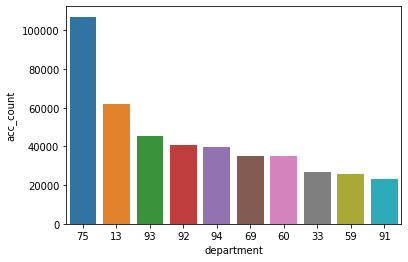

In [26]:
import seaborn as sns
dep_count = df_carac.dep.value_counts()
dep_count = dep_count.to_frame().reset_index().rename(columns={'dep': 'acc_count', 'index': 'department'})
print(dep_count.head())
sns.barplot(x='department', y='acc_count', data=dep_count.head(10), order=dep_count.head(10).department);

# Paris is the region with the highest frequency of road accidents

   atm  acc_count
0  1.0     833118
1  2.0     110141
2  8.0      34618
3  3.0      22922
4  7.0      11923


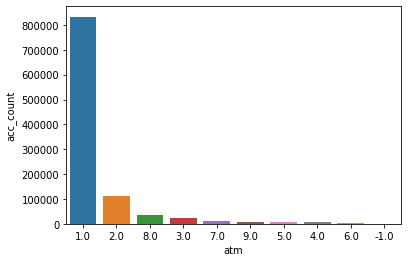

In [27]:
atm_count = df_carac.atm.value_counts()
atm_count = atm_count.to_frame().reset_index().rename(columns={'atm': 'acc_count', 'index': 'atm'})
print(atm_count.head())
sns.barplot(x='atm', y='acc_count', data=atm_count, order=atm_count.atm);

# Atmosphere conditions doesn’t seem to impact the road accidentsfrequency

   lum  acc_count
0    1     706390
1    5     171039
2    3      85533
3    2      62795
4    4       8783


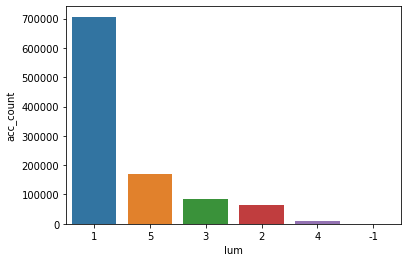

In [28]:
lum_count = df_carac.lum.value_counts()
lum_count = lum_count.to_frame().reset_index().rename(columns={'lum': 'acc_count', 'index': 'lum'})
print(lum_count.head())
sns.barplot(x='lum', y='acc_count', data=lum_count, order=lum_count.lum);

In [29]:
df_acc = df_carac.merge(df_grav, on='Num_Acc')

from datetime import date
from time import perf_counter

#def convert_date(r):
#    an = r.an if r.an > 2000 else 2000+r.an
#    the_date = date(an, r.mois, r.jour)
#    return the_date
#def convert_date_array(r):
#    an = r[0] if r[0] > 2000 else 2000+r[0]
#    the_date = date(an, r[1], r[2])
#    return the_date
def convert_date_scalar(an, mois, jour):
    if an < 2000: an = 2000+an
    the_date = date(an, mois, jour)
    return [the_date, the_date.strftime('%j'), the_date.strftime('%V')]

#, the_date.strftime('%j'), the_date.strftime('%V')
#def nb_day_in_year(d):
#    return d[0].strftime('%j')

start = perf_counter()
#df_acc[['date', 'nb_jour', 'nb_semaine']] = df_acc.apply(convert_date, axis=1, result_type='expand')
#df_acc[['date', 'nb_jour', 'nb_semaine']] = df_acc[['an', 'mois', 'jour']].apply(convert_date_array, raw=True, axis=1, result_type='expand')
#df_acc['date'] = df_acc[['an', 'mois', 'jour']].apply(convert_date_array, raw=True, axis=1)
#df_acc['nb_jour'] = df_acc[['date']].apply(lambda r: r.date.strftime('%j'), axis=1)
# map version is much faster than apply
df_acc2 = pd.DataFrame(map(convert_date_scalar, df_acc.an, df_acc.mois, df_acc.jour), columns=['date', 'nb_jour', 'nb_semaine'], index=df_acc.index)
df_acc = pd.concat([df_acc, df_acc2], axis=1)
end = perf_counter()
print('Elapsed time ', (end - start))

df_acc.sort_values(by='grav_total', ascending=False)

Elapsed time  7.097234823000008


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,gps,lat,long,dep,grav_mean,grav_total,nb_usagers,date,nb_jour,nb_semaine
832306,201800018647,18,9,8,230,5,2,1,1.0,6.0,...,M,4584344.0,615087.0,74,1,13.000000,13,2018-09-08,251,36
581595,201400006577,14,5,24,2345,3,1,1,1.0,6.0,...,M,4763375.0,742054.0,68,1,13.000000,13,2014-05-24,144,21
642655,201500007783,15,3,9,1930,3,1,1,1.0,6.0,...,M,0.0,0.0,60,1,13.000000,13,2015-03-09,068,11
538168,201300021547,13,8,15,2145,3,1,1,1.0,6.0,...,M,4616920.0,386531.0,42,1,13.000000,13,2013-08-15,227,33
933399,202000003117,2020,5,19,20:35,1,2,1,1.0,6.0,...,NaN,"46,0144542","4,3765685",69,1,13.000000,13,2020-05-19,140,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827964,201800014305,18,1,22,1730,2,1,1,3.0,6.0,...,M,4768377.0,676891.0,70,36,0.083333,3,2018-01-22,022,04
820248,201800006589,18,6,11,905,1,1,1,2.0,7.0,...,M,4735480.0,50117.0,37,38,0.078947,3,2018-06-11,162,24
267508,200900023899,9,5,29,1945,1,1,1,1.0,3.0,...,M,0.0,0,80,39,0.076923,3,2009-05-29,149,22
761203,201700008245,17,4,19,1225,1,1,1,1.0,3.0,...,M,4372006.0,115155.0,31,41,0.073171,3,2017-04-19,109,16


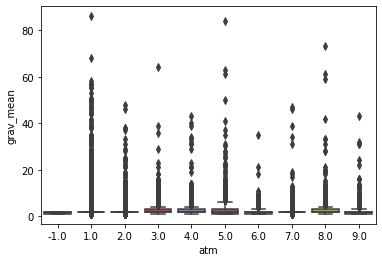

In [30]:
sns.boxplot(data=df_acc, y='grav_mean', x='atm')

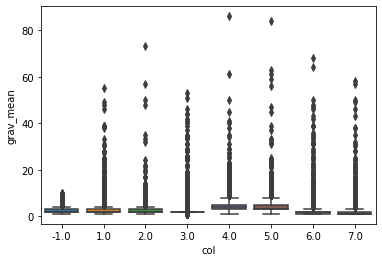

In [31]:
sns.boxplot(data=df_acc, y='grav_mean', x='col')

# No collision accidentshowed the highest road accident severity, followed by the frontal collision of two vehicles

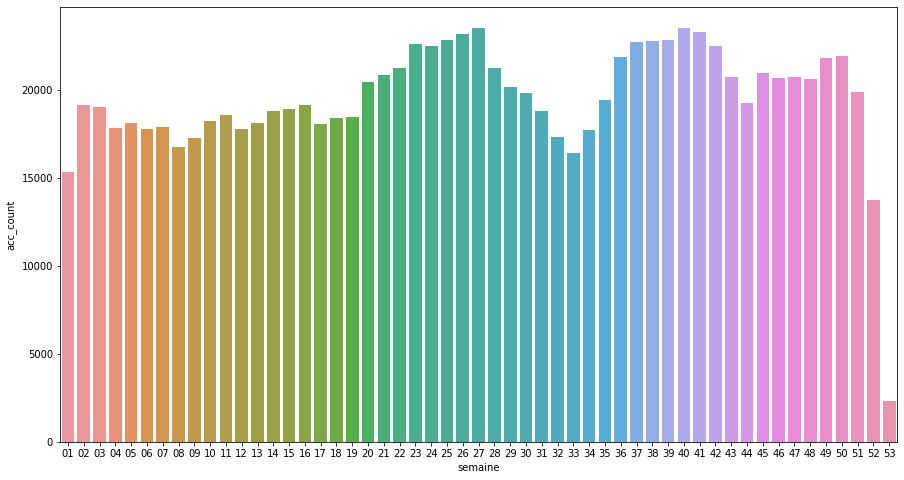

In [32]:
df_nb_semaine_count = df_acc.nb_semaine.value_counts().to_frame().reset_index().rename(columns={'index': 'semaine', 'nb_semaine': 'acc_count'})

from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))

sns.barplot(data=df_nb_semaine_count, x='semaine', y='acc_count', order=df_nb_semaine_count.sort_values(by='semaine').semaine)

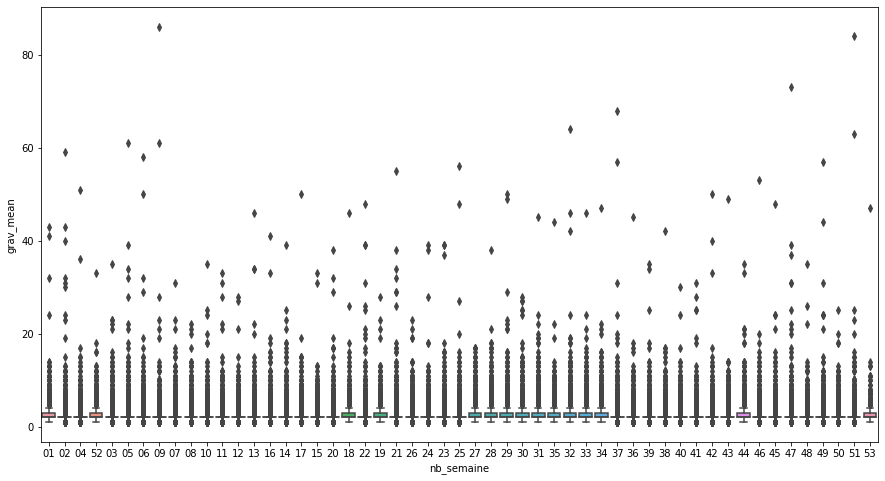

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))

sns.boxplot(data=df_acc, y='grav_mean', x='nb_semaine')

# The period of the year apparently has no influence on the gravity of the severity whereas the frequency of accidents appearsto be higher in the period before and after the summer season with the highest peak the first week of October

In [34]:
df_acc = df_acc.merge(df_lieux[['Num_Acc', 'surf', 'vma']], on='Num_Acc')

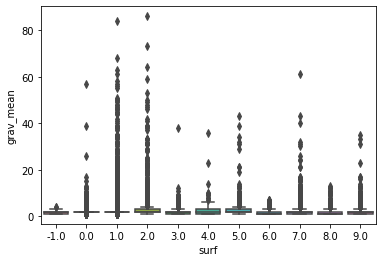

In [35]:
sns.boxplot(data=df_acc, y='grav_mean', x='surf');
#df_acc.boxplot(column='grav_mean', by='surf');

# The severity is likely to be higher when there is flood or snow in the road surface

In [36]:
grav_by_deps = df_acc[['dep', 'grav_mean', 'grav_total', 'nb_usagers']].groupby('dep').agg(['count', 'sum', 'mean'])
grav_by_deps = grav_by_deps.drop(columns=[grav_by_deps.columns[0], grav_by_deps.columns[1], 
                                           grav_by_deps.columns[3], grav_by_deps.columns[8]])
grav_by_deps.columns = ['grav_mean_mean', 'grav_total_total', 'grav_total_mean', 'acc_count', 'nb_usagers_total']
grav_by_deps = grav_by_deps.reset_index()
                       
grav_by_deps.sort_values(by='grav_total_mean', ascending=False)

,dep,grav_mean_mean,grav_total_total,grav_total_mean,acc_count,nb_usagers_total
105,986,2.000000,168.316667,5.259896,32,255
106,987,2.216438,1868.795455,5.119988,365,3627
40,39,2.434652,9968.618645,4.991797,1997,20893
49,48,2.141898,5767.643693,4.842690,1191,10541
82,81,2.189761,14124.169228,4.820536,2930,27002
...,...,...,...,...,...,...
70,69,2.305050,93951.399641,2.677746,35086,196468
92,91,2.260889,59033.414216,2.576303,22914,118937
95,94,2.222007,88637.703835,2.224786,39841,178937
93,92,2.134481,88117.470599,2.161649,40764,171996


In [38]:
df_acc.head()

#df_acc.to_csv('accidents_model.csv')
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DataScience project/Road accidents - model.csv'
with open(path, 'w', encoding = 'ISO-8859-1') as f:
  df_acc.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
